In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
def download_confirmedUS(output_filename):
    """
    Downloads time_series_covid19_confirmed_US.csv from the Johns Hopkins repo and saves a copy in output_filename
    """
    dfConfirmedUS = pd.read_csv(r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
                                dtype={'FIPS': str})
    dfConfirmedUS.to_csv(raw_data_file, index=False)
    return dfConfirmedUS

#download_confirmedUS()

In [3]:
def get_timeseries(df, fips_code):
    """
    dfConfirmed is a dataframe containing data from the time_series_covid19_confirmed_US.csv file downloaded from 
    the Johns Hopkins repo
    
    fips_code is the number in the FIPS field which specifies an area {'Guam':'66', 'Hawaii':'15', 'New York':'36'}
    
    Returns a dataframe containing a time series of cumulative confirmed cases for the area specified by fips_code.
    """
    df = df[df.FIPS.str.startswith(fips_code, na=False)]
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 
                  'Long_', 'Combined_Key'], axis=1)
    df = df.sum().to_frame()
    df.columns = ['cases']
    df = df[df.cases>0]
    
    # Converting index from string to date
    df.index = pd.to_datetime(df.index)
    
    return df

# Get timeseries for Hawaii (fips_code 15)
# get_timeseries(dfConfirmedUS, '15')

In [4]:
def plot_data(df, place_name):
    """
    Plots data in this notebook and also writes the plot to a PNG file.
    """
    plot = df.plot(style='o', title='Confirmed COVID-19 cases in {}'.format(place_name))    
    fig = plot.get_figure()
    fig.savefig('images/{}.png'.format(place_name), bbox_inches='tight')

# Main

In [5]:
raw_data_file = 'ConfirmedUSStates2.csv'
fips_code = {'Guam':'66', 'Hawaii':'15', 'New York':'36'}
place_names = ['Guam', 'Hawaii', 'New York']

In [6]:
# Download time_series_covid19_confirmed_US.csv from the Johns Hopkins repo and save in ConfirmedUSStates2.csv
dfConfirmedUS = download_confirmedUS(raw_data_file)

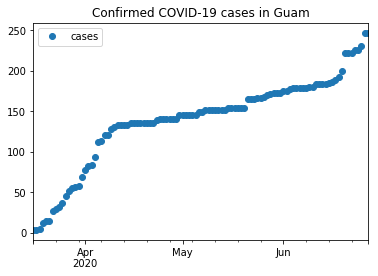

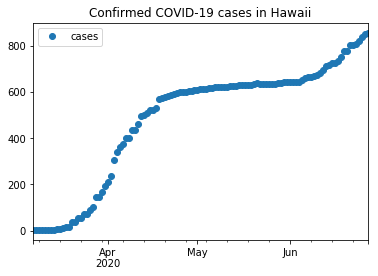

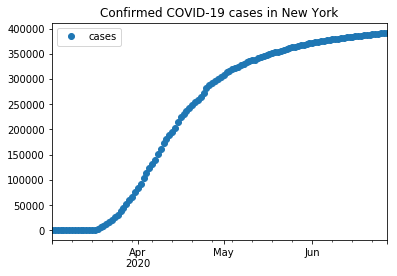

In [7]:
for place_name in place_names:
    df = get_timeseries(dfConfirmedUS, fips_code[place_name])
    df.to_csv('{}.csv'.format(place_name))
    plot_data(df, place_name)